## **O Desafio**

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipos de pessoas tinham mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).


* Survived: Variável alvo (0 ou 1).
* Pclass: Classe da passagem (1, 2 ou 3).
* Name: Nome do passageiro.
* Sex: Sexo (male/female).
* Age: Idade.
* SibSp: Número de irmãos/cônjuges a bordo.
* Parch: Número de pais/filhos a bordo.
* Ticket: Número do bilhete.
* Fare: Tarifa paga.
* Cabin: Cabine (muitos valores faltantes).
* Embarked: Porto de embarque (C = Cherbourg, Q = * Queenstown, S = Southampton).


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer

# **Análise Exploratória de Dados**

## **Visão Geral do DataFrame**

In [40]:
train = pd.read_csv('Dados/train.csv')
test = pd.read_csv('Dados/test.csv')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [45]:
train.shape

(891, 12)

In [46]:
test.shape

(418, 11)

In [47]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **Análise Exploratória**

Analisando os Sobreviventes por Sexo

In [49]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Analisando os Sobreviventes por Classe

In [50]:
train.groupby('Survived')['Pclass'].mean()

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

## **Visualização**

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sobreviventes por sexo

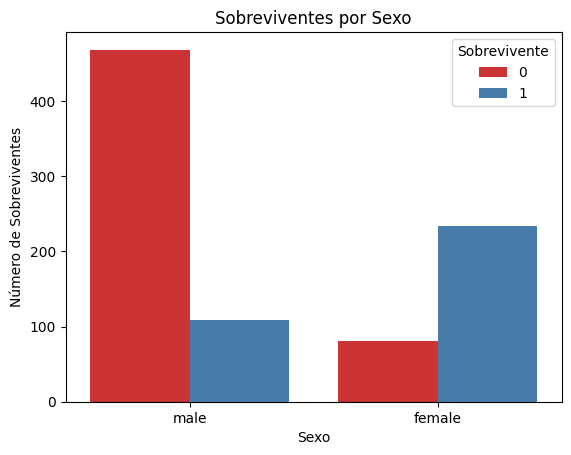

In [52]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set1') 
plt.xlabel('Sexo')
plt.ylabel('Número de Sobreviventes')
plt.legend(title='Sobrevivente', loc='upper right')
plt.title('Sobreviventes por Sexo')
plt.show()

Sobreviventes por classe

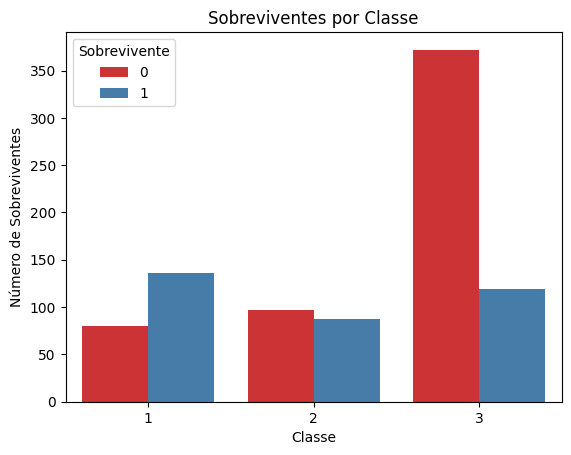

In [53]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set1')
plt.xlabel('Classe')
plt.ylabel('Número de Sobreviventes')
plt.legend(title='Sobrevivente', loc='upper left')
plt.title('Sobreviventes por Classe')
plt.show()

Distribuição de idades

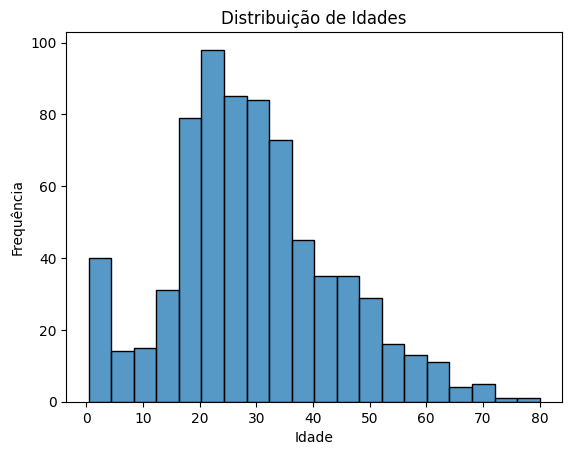

In [54]:
sns.histplot(train['Age'].dropna(), bins=20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.show()

Boxplot de idade

C:\Users\lucas\AppData\Local\Temp\ipykernel_10444\1872383533.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='Set1')


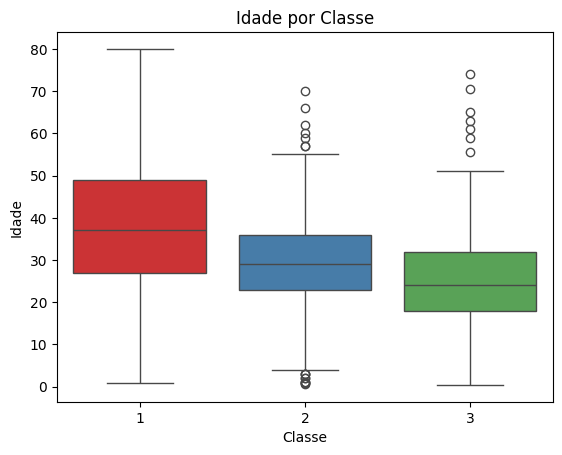

In [55]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='Set1')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.title('Idade por Classe')
plt.show()

Sobreviventes por porto de embarque

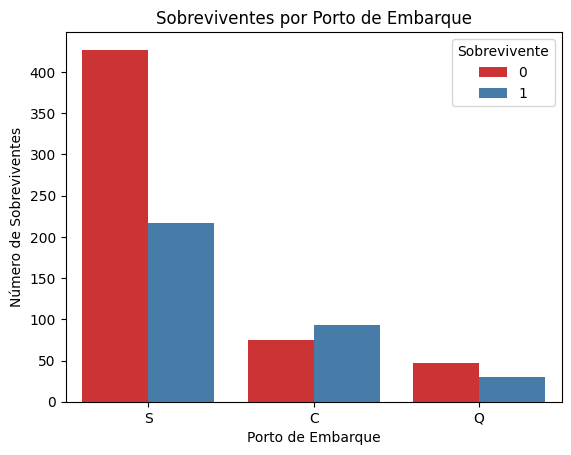

In [56]:
sns.countplot(x='Embarked', hue='Survived', data=train, palette='Set1')
plt.xlabel('Porto de Embarque')
plt.ylabel('Número de Sobreviventes')
plt.legend(title='Sobrevivente', loc='upper right')
plt.title('Sobreviventes por Porto de Embarque')
plt.show()

Distribuição de tarifas (Fare) por sobrevivência

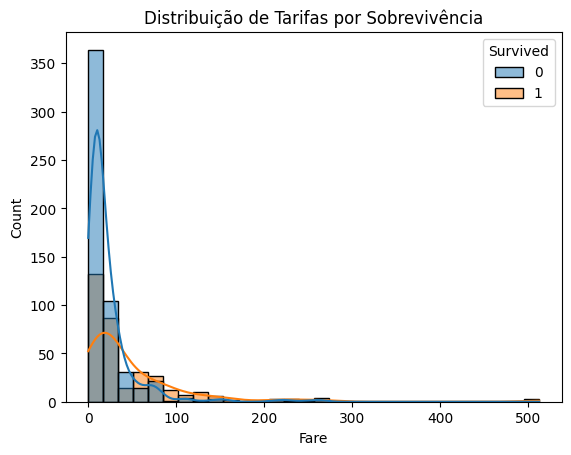

In [57]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Distribuição de Tarifas por Sobrevivência')
plt.show()

Distribuição de tarifas (Fare) por sobrevivência

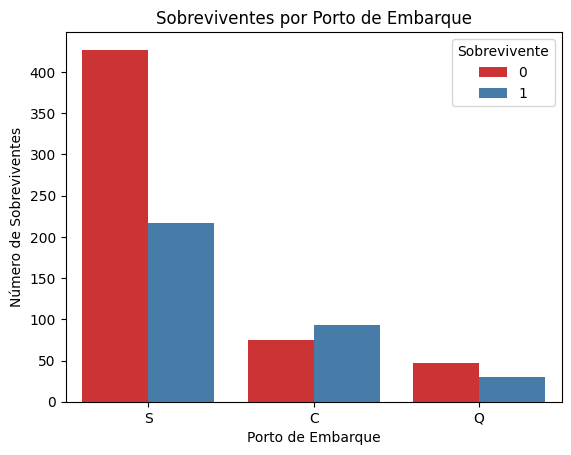

In [58]:
sns.countplot(x='Embarked', hue='Survived', data=train, palette='Set1')
plt.xlabel('Porto de Embarque')
plt.ylabel('Número de Sobreviventes')
plt.legend(title='Sobrevivente', loc='upper right')
plt.title('Sobreviventes por Porto de Embarque')
plt.show()

# **Pré-processamento dos Dados**

## **Tratamento de valores ausentes**

In [59]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Adicionando a Mediana nos valores faltantes da coluna 'Age'

In [61]:
train['Age'].isnull().sum()

np.int64(177)

In [62]:
test['Age'].isnull().sum()

np.int64(86)

In [63]:
train['Age'].median()

np.float64(28.0)

In [64]:
test['Age'].median()

np.float64(27.0)

In [65]:
train['Age'].fillna(train['Age'].median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10444\486169235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [66]:
test['Age'].fillna(test['Age'].median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10444\2335094323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)


In [67]:
train['Age'].isnull().sum()

np.int64(0)

In [68]:
test['Age'].isnull().sum()

np.int64(0)

Excluindo a coluna 'Cabin'

In [69]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
train['Cabin'].isnull().sum()

np.int64(687)

In [72]:
test['Cabin'].isnull().sum()

np.int64(327)

In [73]:
train.drop(columns='Cabin', axis=1, inplace=True)

In [74]:
test.drop(columns='Cabin', axis=1, inplace=True)

In [75]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [76]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Adicionando a Moda nos valores faltantes da coluna 'Embarked'

In [77]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [78]:
train['Embarked'].isnull().sum()

np.int64(2)

In [79]:
test['Embarked'].isnull().sum()

np.int64(0)

In [80]:
train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [81]:
train['Embarked'].fillna('S', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10444\1021043716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


In [82]:
train['Embarked'].isnull().sum()

np.int64(0)

Adicionando a média a coluna 'Fare'

In [83]:
train['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [84]:
train['Fare'].isnull().sum()

np.int64(0)

In [85]:
test['Fare'].isnull().sum()

np.int64(1)

In [86]:
test.fillna(test['Fare'].median(), inplace=True)

In [87]:
test['Fare'].isnull().sum()

np.int64(0)

In [88]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **Engenharia de Features**

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [91]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Craiando uma nova coluna para mostrar os familiares

In [92]:
train['Family_Size'] = (train['SibSp'] + train['Parch']).astype(int)

In [93]:
train.Family_Size.head()

0    1
1    1
2    0
3    1
4    0
Name: Family_Size, dtype: int64

In [94]:
test['Family_Size'] = (test['SibSp'] + test['Parch']).astype(int)

In [95]:
test.Family_Size.head()

0    0
1    1
2    0
3    0
4    2
Name: Family_Size, dtype: int64

Criando uma nova coluna para os titulos dos passageiros

* "Mr." indica geralmente um homem adulto.
* "Mrs." indica geralmente uma mulher casada.
* "Miss." indica geralmente uma mulher solteira.
* "Master." era um título para meninos jovens.

In [96]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [97]:
test.Name.head()

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [98]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\lucas\AppData\Local\Temp\ipykernel_10444\728421299.py:1: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\lucas\AppData\Local\Temp\ipykernel_10444\728421299.py:2: SyntaxWarning: invalid escape sequence '\.'
  test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [99]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [100]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [101]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


In [103]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,Mrs


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Family_Size  891 non-null    int64  
 12  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Family_Size  418 non-null    int64  
 11  Title        418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [106]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_Size    0
Title          0
dtype: int64

In [107]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_Size    0
Title          0
dtype: int64

Excluindo colunas não relevantes. 'PassengerId', 'Name', 'Ticket'

In [108]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Title'],
      dtype='object')

In [109]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Title'],
      dtype='object')

In [110]:
train.drop(['PassengerId', 'Name', 'Ticket', ],axis=1, inplace=True)

In [111]:
test.drop(['PassengerId', 'Name', 'Ticket', ],axis=1, inplace=True)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Family_Size  891 non-null    int64  
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Family_Size  418 non-null    int64  
 8   Title        418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [114]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr


In [115]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,3,male,34.5,0,0,7.8292,Q,0,Mr
1,3,female,47.0,1,0,7.0000,S,1,Mrs
2,2,male,62.0,0,0,9.6875,Q,0,Mr
3,3,male,27.0,0,0,8.6625,S,0,Mr
4,3,female,22.0,1,1,12.2875,S,2,Mrs


## **Codificação de variáveis categóricas**

Aplicando o OneHotEncoding para 'Sex', 'Title', 'Embarked'

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Family_Size  891 non-null    int64  
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Family_Size  418 non-null    int64  
 8   Title        418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [118]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [119]:
categorical_columns = ['Sex', 'Title', 'Embarked']
train_numeric_columns = ['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']
test_numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size'  ]

In [120]:
train_encoded = encoder.fit_transform(train[categorical_columns]).astype(int)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
train_encoded_df.head()

,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [121]:
test_encoded = encoder.fit_transform(test[categorical_columns]).astype(int)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
test_encoded_df.head()

,Sex_female,Sex_male,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [122]:
train = pd.concat([train_encoded_df, train[train_numeric_columns].reset_index(drop=True)], axis=1)
test = pd.concat([test_encoded_df, test[test_numeric_columns].reset_index(drop=True)], axis=1)

In [123]:
test = test.reindex(columns=train.columns, fill_value=0)

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_female      891 non-null    int64  
 1   Sex_male        891 non-null    int64  
 2   Title_Capt      891 non-null    int64  
 3   Title_Col       891 non-null    int64  
 4   Title_Countess  891 non-null    int64  
 5   Title_Don       891 non-null    int64  
 6   Title_Dr        891 non-null    int64  
 7   Title_Jonkheer  891 non-null    int64  
 8   Title_Lady      891 non-null    int64  
 9   Title_Major     891 non-null    int64  
 10  Title_Master    891 non-null    int64  
 11  Title_Miss      891 non-null    int64  
 12  Title_Mlle      891 non-null    int64  
 13  Title_Mme       891 non-null    int64  
 14  Title_Mr        891 non-null    int64  
 15  Title_Mrs       891 non-null    int64  
 16  Title_Ms        891 non-null    int64  
 17  Title_Rev       891 non-null    int

In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_female      418 non-null    int64  
 1   Sex_male        418 non-null    int64  
 2   Title_Capt      418 non-null    int64  
 3   Title_Col       418 non-null    int64  
 4   Title_Countess  418 non-null    int64  
 5   Title_Don       418 non-null    int64  
 6   Title_Dr        418 non-null    int64  
 7   Title_Jonkheer  418 non-null    int64  
 8   Title_Lady      418 non-null    int64  
 9   Title_Major     418 non-null    int64  
 10  Title_Master    418 non-null    int64  
 11  Title_Miss      418 non-null    int64  
 12  Title_Mlle      418 non-null    int64  
 13  Title_Mme       418 non-null    int64  
 14  Title_Mr        418 non-null    int64  
 15  Title_Mrs       418 non-null    int64  
 16  Title_Ms        418 non-null    int64  
 17  Title_Rev       418 non-null    int

In [126]:
train.shape

(891, 29)

In [127]:
test.shape

(418, 29)

# **Modelagem**

## **Extração dos Dados**

Separar features e target

In [128]:
train.columns

Index(['Sex_female', 'Sex_male', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family_Size'],
      dtype='object')

In [129]:
X = train.drop('Survived', axis=1)
X.columns

Index(['Sex_female', 'Sex_male', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family_Size'],
      dtype='object')

In [130]:
X.shape

(891, 28)

In [131]:
y = train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [132]:
y.shape

(891,)

Dividir os dados

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [134]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}')

Train shape: (712, 28), Test shape: (179, 28)
Train labels shape: (712,), Test labels shape: (179,)


## **Modelo**

**Regressão Logística**

In [135]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred1 = model.predict(X_test)
y_pred1

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

## **Avaliar o modelo**

In [137]:
accuracy_score1 = accuracy_score(y_pred1, y_test)
confusion_matrix1 = confusion_matrix(y_pred1, y_test)
classification_report1 = classification_report(y_pred1, y_test)

In [138]:
print(f"Acurácia: {accuracy_score1}")
print(f"Matriz de Confusão:\n{confusion_matrix1}")
print(f"Relatório de Classificação:\n{classification_report1}")

Acurácia: 0.8268156424581006
Matriz de Confusão:
[[98 19]
 [12 50]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       117
           1       0.72      0.81      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



## **Ajuste de hiperparâmetros**

In [139]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=42))])

In [140]:
param_grid = {
    'logistic__penalty': ['l1', 'l2', 'elasticnet', None],
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logistic__l1_ratio': [None, 0.2, 0.5, 0.8] # Apenas para 'elasticnet'
}

In [141]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
990 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\lucas\Ap

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logistic__l1_ratio': [None, 0.2, 0.5, 0.8],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet', None],
                         'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                              'sag', 'saga']},
             scoring='accuracy')

In [142]:
print("\nMelhores Hiperparâmetros Encontrados:", grid_search.best_params_)


Melhores Hiperparâmetros Encontrados: {'logistic__C': 10, 'logistic__l1_ratio': None, 'logistic__penalty': 'l2', 'logistic__solver': 'newton-cg'}


In [143]:
# Obter o melhor modelo
best_pipeline = grid_search.best_estimator_

In [144]:
y_pred_optimized = best_pipeline.predict(X_test)

In [145]:
print(f"Acurácia: {accuracy_score1}")
print(f"Matriz de Confusão:\n{confusion_matrix1}")
print(f"Relatório de Classificação:\n{classification_report1}")

Acurácia: 0.8268156424581006
Matriz de Confusão:
[[98 19]
 [12 50]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       117
           1       0.72      0.81      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



# **Previsão e Submissão**

In [146]:
test.head()

,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,3,34.5,0,0,7.8292,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,3,47.0,1,0,7.0000,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,2,62.0,0,0,9.6875,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,3,27.0,0,0,8.6625,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,3,22.0,1,1,12.2875,2


In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_female      418 non-null    int64  
 1   Sex_male        418 non-null    int64  
 2   Title_Capt      418 non-null    int64  
 3   Title_Col       418 non-null    int64  
 4   Title_Countess  418 non-null    int64  
 5   Title_Don       418 non-null    int64  
 6   Title_Dr        418 non-null    int64  
 7   Title_Jonkheer  418 non-null    int64  
 8   Title_Lady      418 non-null    int64  
 9   Title_Major     418 non-null    int64  
 10  Title_Master    418 non-null    int64  
 11  Title_Miss      418 non-null    int64  
 12  Title_Mlle      418 non-null    int64  
 13  Title_Mme       418 non-null    int64  
 14  Title_Mr        418 non-null    int64  
 15  Title_Mrs       418 non-null    int64  
 16  Title_Ms        418 non-null    int64  
 17  Title_Rev       418 non-null    int

## **Fazer as Previsões no Conjunto de Teste**

In [148]:
X_test_processed = test.drop('Survived', axis=1)
X_test_processed.columns

Index(['Sex_female', 'Sex_male', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family_Size'],
      dtype='object')

In [149]:
X_test_processed.shape

(418, 28)

In [150]:
predictions_test = best_pipeline.predict(X_test_processed)
predictions_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## **Criar o Arquivo de Submissão**

Carregar o arquivo test.csv original (para obter os PassengerId)

In [156]:
test_original = pd.read_csv('Dados/test.csv')
test_original.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Criar um DataFrame com as colunas 'PassengerId' e 'Survived'

In [152]:
submission = pd.DataFrame({
    'PassengerId': test_original['PassengerId'],
    'Survived': predictions_test.astype(int)
})


Salvar o DataFrame em um arquivo CSV chamado 'submission.csv'

In [153]:
submission.to_csv('submission.csv', index=False)

print("Arquivo de submissão 'submission.csv' criado com sucesso!")

Arquivo de submissão 'submission.csv' criado com sucesso!


In [157]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
